# 👨‍⚖️ GenAI Lawyer: Your Personal Legal Assistant
## Author: Nanthitha Balamurugan

Welcome to the GenAI Lawyer! 🌟 Whether you’re dealing with a legal issue, need advice on your rights, or just want to understand a law better, I’m here to help you with tailored, easy-to-understand legal advice. Let’s break it down step-by-step! 📝⚖️

## 1. Case Input: Tell Me Your Story 📣
To start, you'll need to provide the details of your legal situation or question. You can ask about anything! Here’s what the GenAI Lawyer needs:

Facts of the case (e.g., "I got fired without any notice after 3 years of work.")

Legal questions (e.g., "What are my rights in a property dispute?")

Desired outcomes (e.g., "Can I sue for defamation?")

Feel free to explain your situation in detail! 🗣️💬

## 2. Case Analysis: Let’s Analyze 🔍
I’ll then analyze your situation by identifying:

The legal issue you're facing (wrongful termination, breach of contract, property rights, etc.) 💼🏠

Relevant laws and rules that might apply (like labor law, contract law, IPC sections, etc.) 📜⚖️

Any precedents or examples from previous cases that could guide the solution ⚖️💡

## 3. Legal Solution: Here’s What You Can Do ⚡
Based on my analysis, I’ll give you a step-by-step plan on how to handle your situation. This will include:

Which laws apply to your case 🏛️

What actions you should take (like filing complaints, seeking compensation, or going to court) 💪📑

What outcomes you can expect based on the situation ⚖️

I’ll make it simple, clear, and easy to understand! 🌟



# 1: Install Necessary Libraries 📦
First, we need to install the required Python libraries in our notebook to work with the Google Gemini API, LangChain, and legal datasets.

In [1]:
!pip install google-cloud-language
!pip install openai
!pip install langchain
!pip install transformers


In [2]:
import os
import json
import requests


# 2 Authenticate API Key
Assuming you’ve stored your Google API key in Kaggle Secrets, retrieve the API key securely from the Kaggle environment, store api key in secret add ons.
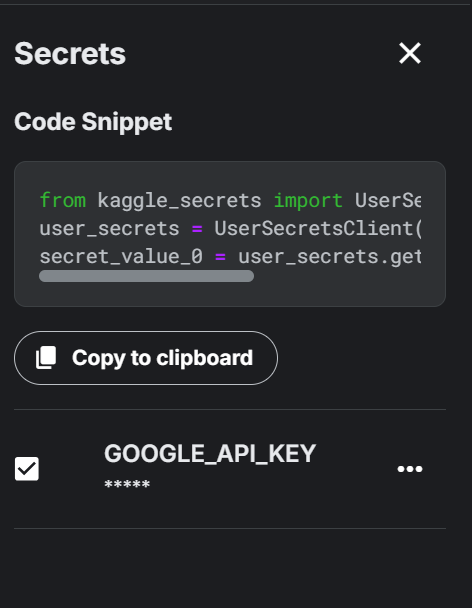


#  3. Legal Query Handler Using Gemini 2.0 Flash
Now, we create the function legal_query_handler that takes a query, finds relevant IPC sections, and uses the Gemini Flash 2.0 model to provide legal insights based on the query.



In [3]:
import requests
import json
from kaggle_secrets import UserSecretsClient

# Get your API key securely from Kaggle secrets
user_secrets = UserSecretsClient()
api_key = user_secrets.get_secret("GOOGLE_API_KEY")

# Function to get legal advice using the Gemini API
def get_legal_advice(question):
    url = f"https://generativelanguage.googleapis.com/v1beta/models/gemini-2.0-flash:generateContent?key={api_key}"
    headers = {"Content-Type": "application/json"}
    data = {
        "contents": [{"role": "user", "parts": [{"text": question}]}]
    }

    try:
        response = requests.post(url, headers=headers, json=data)
        
        if response.status_code == 200:
            result = response.json()
            print("Full API Response:", json.dumps(result, indent=2))  # Debugging
            if "candidates" in result and len(result["candidates"]) > 0:
                return result["candidates"][0]["content"]["parts"][0]["text"]
            else:
                return "Sorry, I couldn't understand your question. Try again."
        else:
            return f"❌ Error: Status code {response.status_code} - {response.text}"
    
    except Exception as e:
        return f"⚠️ Exception occurred: {str(e)}"

# 5. Start the Legal Chat Loop
This is the main loop where the user can interact with the GenAI Lawyer chatbot. The program will keep asking the user for input, process the query, and print the legal insights.

In [4]:
# Main function to simulate asking questions
def main():
    print("Welcome to the Gen AI Lawyer! You can ask me any legal question.")
    conversation = ""  # Store the conversation

    # Predefined list of questions
    questions = [
        "What is IPC section 354?",
        "What is the punishment for theft under IPC?",
        "Can a person be arrested without a warrant in India?",
        "What are the rights of a woman under IPC?"
    ]
    
    for question in questions:
        print(f"You: {question}")
        
        # Get legal advice and add to the conversation
        answer = get_legal_advice(question)
        conversation += f"You: {question}\nGen AI Lawyer: {answer}\n\n"
        print(f"Gen AI Lawyer: {answer}")

if __name__ == "__main__":
    main()

Welcome to the Gen AI Lawyer! You can ask me any legal question.
You: What is IPC section 354?
Full API Response: {
  "candidates": [
    {
      "content": {
        "parts": [
          {
            "text": "Section 354 of the Indian Penal Code (IPC) deals with **Assault or criminal force to woman with intent to outrage her modesty.**\n\nIn simple terms, it punishes anyone who assaults or uses criminal force on a woman with the intention of outraging her modesty.  This includes acts such as unwanted touching, groping, or any other physical act that is considered an invasion of a woman's personal space and is done with the intention to offend her sense of decency and respect.\n\n**Key Elements of Section 354:**\n\n*   **Assault or Criminal Force:**  There must be an assault or use of criminal force. \"Assault\" is defined separately in the IPC and generally involves gestures or preparations that put a person in fear of being subjected to criminal force. \"Criminal Force\" is the use 